In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import special
import scipy.integrate as integrate
print("Packages imported.")

Packages imported.


# Fluctuation Matrix

$\Delta_M := \frac{1}{N} \Psi_{\leq M} \Psi_{\leq M}^\top -\mathbf{I}_M$.

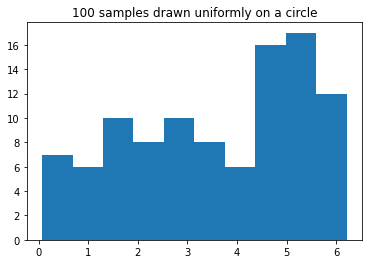

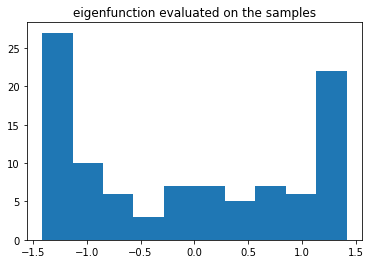

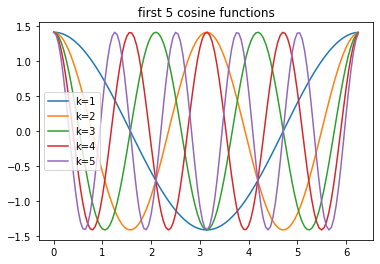

(50, 100)
(100, 50)
2.1266148976945543


In [15]:
N = 100
M = 50
X = np.random.random(N)*2*np.pi

plt.hist(X)
plt.title("{} samples drawn uniformly on a circle".format(N))
plt.show()


def psi_cosine(x):
    return [np.sqrt(2)*np.cos(k*x) for k in range(1,M+1)]

plt.hist(psi_cosine(X)[1])
plt.title("eigenfunction evaluated on the samples")
plt.show()

x = np.arange(0,2*np.pi,0.05)

for k in range(1,5+1):
    plt.plot(x,np.sqrt(2)*np.cos(k*x),label="k={}".format(k))
plt.title("first 5 cosine functions")
plt.legend()
plt.show()

print(np.matrix(psi(X)).shape)
print(np.transpose(np.matrix(psi(X))).shape)

delta = np.matmul(np.matrix(psi(X)),np.transpose(np.matrix(psi(X))))/N - np.identity(M)
print(np.linalg.norm(delta,ord=2))



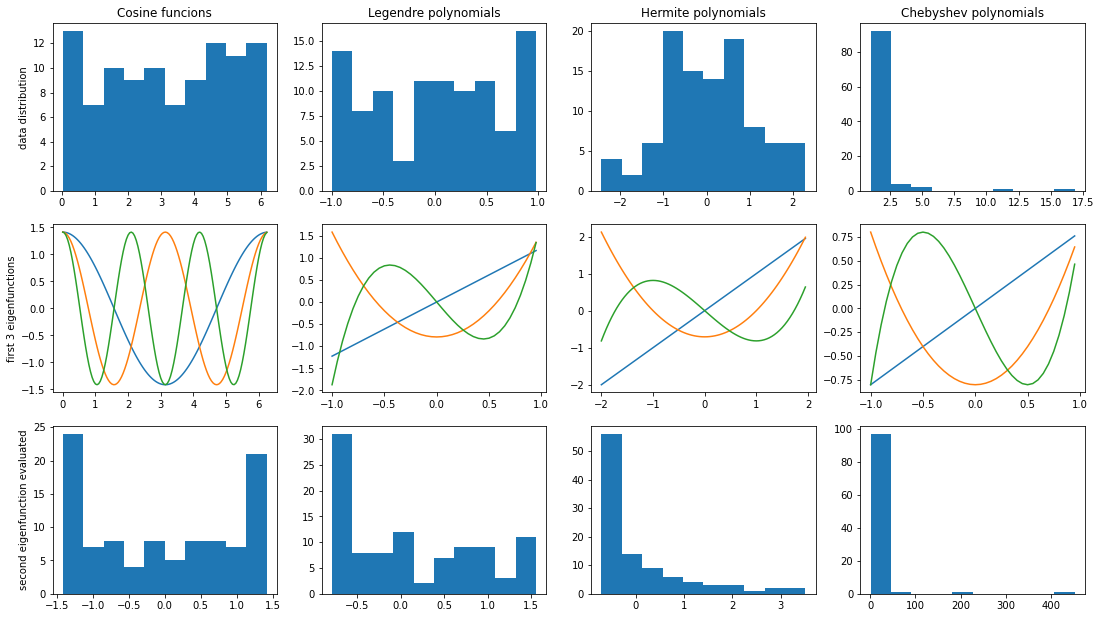

In [4]:
N = 100
M = 10

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].set_title('Cosine funcions')
axs[0, 1].set_title('Legendre polynomials')
axs[0, 2].set_title('Hermite polynomials')
axs[0, 3].set_title('Chebyshev polynomials')

axs[0,0].set(ylabel='data distribution')
axs[1,0].set(ylabel='first 3 eigenfunctions')
axs[2,0].set(ylabel='second eigenfunction evaluated')

X = np.random.random(N)*2*np.pi
x_axis = np.arange(0,2*np.pi,0.05)
def psi_cosine(x):
    return [np.sqrt(2)*np.cos(k*x) for k in range(1,M+1)]
axs[0, 0].hist(X)
for k in range(1,3+1):
    axs[1,0].plot(x_axis,np.sqrt(2)*np.cos(k*x_axis),label="k={}".format(k))
axs[2, 0].hist(psi_cosine(X)[1])

X = np.random.random(N)*2-1
x_axis = np.arange(-1,1,0.05)
def psi_legendre(x):
    return [np.sqrt((2*k+1)/2)*special.eval_legendre(k,x) for k in range(1,M+1)]
axs[0, 1].hist(X)
for k in range(1,3+1):
    axs[1,1].plot(x_axis,np.sqrt((2*k+1)/2)*special.eval_legendre(k,x_axis),label="k={}".format(k))
axs[2, 1].hist(psi_legendre(X)[1])

X = np.random.normal(0,1,N)
x_axis = np.arange(-2,2,0.05)
def psi_hermite(x):
    return [np.sqrt(1/special.factorial(k))*special.eval_hermitenorm(k,x) for k in range(1,M+1)]
axs[0, 2].hist(X)
for k in range(1,3+1):
    axs[1,2].plot(x_axis,np.sqrt(1/special.factorial(k))*special.eval_hermitenorm(k,x_axis),label="k={}".format(k))
axs[2, 2].hist(psi_hermite(X)[1])

X = 1/np.sqrt(1-(np.random.random(N)*2-1)**2) 
x_axis = np.arange(-1,1,0.05)
def psi_chebyshev(x):
    return [np.sqrt(2/np.pi)*special.eval_chebyt(k,x) for k in range(1,M+1)]
axs[0, 3].hist(X)
for k in range(1,3+1):
    axs[1,3].plot(x_axis,np.sqrt(2/np.pi)*special.eval_chebyt(k,x_axis),label="k={}".format(k))
axs[2, 3].hist(psi_chebyshev(X)[1])


plt.show()

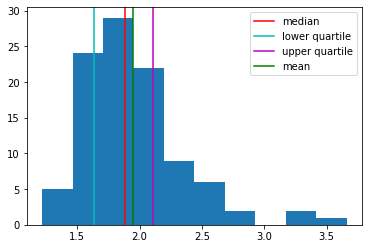

In [68]:
N = 100
M = 50
list_norm = []
for it in range(100):
    X = np.random.random(N)*2*np.pi
    delta = np.matmul(np.matrix(psi_cosine(X)),np.transpose(np.matrix(psi_cosine(X))))/N - np.identity(M)
    list_norm.append(np.linalg.norm(delta,ord=2))

plt.hist(list_norm)
plt.axvline(np.quantile(list_norm,0.5), color = 'r',label="median" )
plt.axvline(np.quantile(list_norm,0.25), color = 'c',label="lower quartile" )
plt.axvline(np.quantile(list_norm,0.75), color = 'm',label="upper quartile" )
plt.axvline(np.mean(list_norm), color = 'g',label="mean" )
plt.legend()
plt.show()


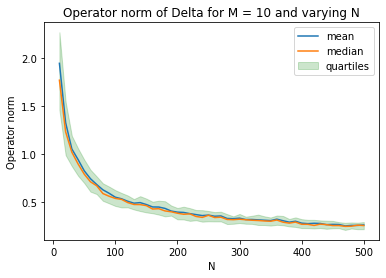

In [69]:
M=10
N_list = np.arange(1,50+1)*M

mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []

for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.random(N)*2*np.pi
        delta = np.matmul(np.matrix(psi_cosine(X)),np.transpose(np.matrix(psi_cosine(X))))/N - np.identity(M)
        list_norm.append(np.linalg.norm(delta,ord=2))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))

plt.plot(N_list, mean_list, label = "mean")
plt.plot(N_list, median_list, label = "median")
plt.fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
plt.xlabel("N")
plt.ylabel("Operator norm")
plt.legend()
plt.title("Operator norm of Delta for M = {} and varying N".format(M))
#plt.rcParams["figure.figsize"] = (40,12)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()

In [17]:
np.mean(list_norm)

0.10986045638410605

In [70]:
Eta =  np.matmul(np.matrix(psi_cosine(X)), np.sqrt(2)*np.cos((M+1)*X))/N
print(np.linalg.norm(Eta))


0.11021166241255043


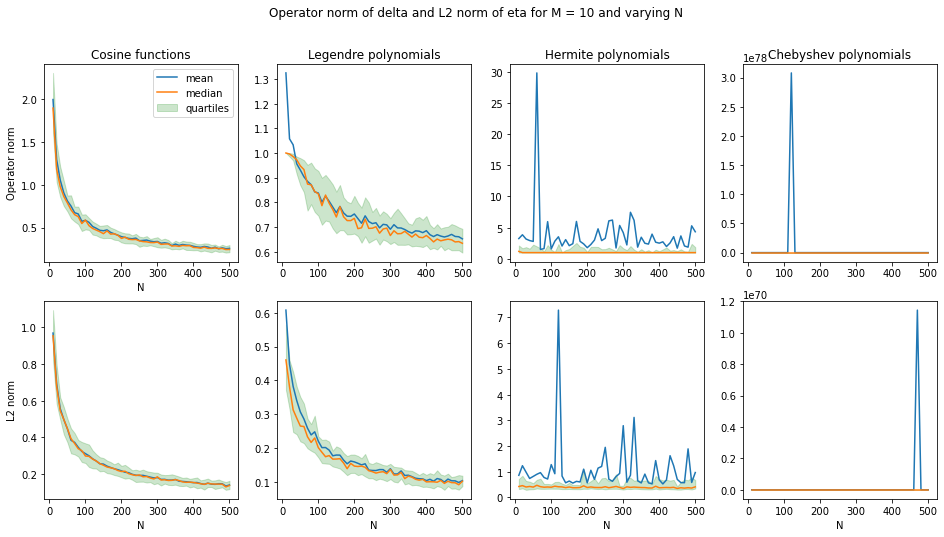

In [5]:
M=10
N_list = np.arange(1,50+1)*M

fig, axs = plt.subplots(2,4)
fig.set_size_inches(16, 8)
fig.suptitle("Operator norm of delta and L2 norm of eta for M = {} and varying N".format(M))

#cosine funtions
mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.random(N)*2*np.pi
        delta = np.matmul(np.matrix(psi_cosine(X)),np.transpose(np.matrix(psi_cosine(X))))/N - np.identity(M)
        list_norm.append(np.linalg.norm(delta,ord=2))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[0,0].plot(N_list, mean_list, label = "mean")
axs[0,0].plot(N_list, median_list, label = "median")
axs[0,0].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[0,0].set(xlabel="N",ylabel="Operator norm")
axs[0,0].set_title("Cosine functions")
axs[0,0].legend()

mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.random(N)*2*np.pi
        Eta =  np.matmul(np.matrix(psi_cosine(X)), np.sqrt(2)*np.cos((M+1)*X))/N
        list_norm.append(np.linalg.norm(Eta))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[1,0].plot(N_list, mean_list, label = "mean")
axs[1,0].plot(N_list, median_list, label = "median")
axs[1,0].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[1,0].set(xlabel="N",ylabel="L2 norm")

#legendre polynomial
mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.random(N)*2-1
        delta = np.matmul(np.matrix(psi_legendre(X)),np.transpose(np.matrix(psi_legendre(X))))/N - np.identity(M)
        list_norm.append(np.linalg.norm(delta,ord=2))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[0,1].plot(N_list, mean_list, label = "mean")
axs[0,1].plot(N_list, median_list, label = "median")
axs[0,1].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[0,1].set_title("Legendre polynomials")


mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.random(N)*2-1
        Eta =  np.matmul(np.matrix(psi_legendre(X)), np.sqrt((2*M+3)/2)*special.eval_legendre(M+1,X))/N
        list_norm.append(np.linalg.norm(Eta))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[1,1].plot(N_list, mean_list, label = "mean")
axs[1,1].plot(N_list, median_list, label = "median")
axs[1,1].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[1,1].set(xlabel="N")

#Hermite polynomial
mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.normal(0,1,N)
        delta = np.matmul(np.matrix(psi_hermite(X)),np.transpose(np.matrix(psi_hermite(X))))/N - np.identity(M)
        list_norm.append(np.linalg.norm(delta,ord=2))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[0,2].plot(N_list, mean_list, label = "mean")
axs[0,2].plot(N_list, median_list, label = "median")
axs[0,2].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[0,2].set_title("Hermite polynomials")


mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = np.random.normal(0,1,N)
        Eta =  np.matmul(np.matrix(psi_hermite(X)), np.sqrt(1/special.factorial(M+1))*special.eval_hermitenorm(M+1,X))/N
        list_norm.append(np.linalg.norm(Eta))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[1,2].plot(N_list, mean_list, label = "mean")
axs[1,2].plot(N_list, median_list, label = "median")
axs[1,2].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[1,2].set(xlabel="N")

#Chebyshev polynomial
mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = 1/np.sqrt(1-(np.random.random(N)*2-1)**2) 
        delta = np.matmul(np.matrix(psi_chebyshev(X)),np.transpose(np.matrix(psi_chebyshev(X))))/N - np.identity(M)
        list_norm.append(np.linalg.norm(delta,ord=2))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[0,3].plot(N_list, mean_list, label = "mean")
axs[0,3].plot(N_list, median_list, label = "median")
axs[0,3].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[0,3].set_title("Chebyshev polynomials")


mean_list = []
median_list = []
upper_quartile_list = []
lower_quartile_list = []
for i, N in enumerate(N_list):
    list_norm = []
    for it in range(100):
        X = 1/np.sqrt(1-(np.random.random(N)*2-1)**2) 
        Eta =  np.matmul(np.matrix(psi_chebyshev(X)), np.sqrt(2/np.pi)*special.eval_chebyt(M+1,X))/N
        list_norm.append(np.linalg.norm(Eta))
    mean_list.append(np.mean(list_norm))
    median_list.append(np.quantile(list_norm,0.5))
    upper_quartile_list.append(np.quantile(list_norm,0.75))
    lower_quartile_list.append(np.quantile(list_norm,0.25))
axs[1,3].plot(N_list, mean_list, label = "mean")
axs[1,3].plot(N_list, median_list, label = "median")
axs[1,3].fill_between(N_list, lower_quartile_list, upper_quartile_list, color = 'g', alpha = 0.2, label = "quartiles")
axs[1,3].set(xlabel="N")

plt.show()



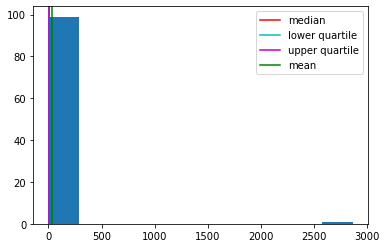

1.7521309679926849


In [288]:
N = 100
M = 50
list_norm = []
for it in range(100):
    X = np.random.normal(0,1,N)
    delta = np.matmul(np.matrix(psi_hermite(X)),np.transpose(np.matrix(psi_hermite(X))))/N - np.identity(M)
    list_norm.append(np.linalg.norm(delta,ord=2))

plt.hist(list_norm)
plt.axvline(np.quantile(list_norm,0.5), color = 'r',label="median" )
plt.axvline(np.quantile(list_norm,0.25), color = 'c',label="lower quartile" )
plt.axvline(np.quantile(list_norm,0.75), color = 'm',label="upper quartile" )
plt.axvline(np.mean(list_norm), color = 'g',label="mean" )
plt.legend()
plt.show()


print(np.quantile(list_norm,0.5))

In [625]:
N=500
X=np.random.normal(0,1,N)
delta = np.matmul(np.matrix(psi_hermite(X)),np.transpose(np.matrix(psi_hermite(X))))/N - np.identity(M)
print(np.linalg.norm(delta,2))
print(delta)

2.8079990949253846
[[ 0.01630156  0.01065074  0.02607803  0.03296752  0.13487016  0.12679691
   0.00274013 -0.07217457 -0.15278998 -0.0469041 ]
 [ 0.01065074  0.04008972  0.07597351  0.24796716  0.24673519  0.20176751
   0.08213277 -0.28474763 -0.23085489 -0.07339079]
 [ 0.02607803  0.07597351  0.30512491  0.37934254  0.49534556  0.37086688
  -0.15902326 -0.20679986 -0.5024375  -0.32956751]
 [ 0.03296752  0.24796716  0.37934254  0.64419221  0.66465623  0.22156813
   0.12702255 -0.73195043 -0.63136557 -0.04065919]
 [ 0.13487016  0.24673519  0.49534556  0.66465623  0.44385741  0.5466761
  -0.52145451 -0.50142616 -0.59012156 -0.25196577]
 [ 0.12679691  0.20176751  0.37086688  0.22156813  0.5466761  -0.32164095
  -0.10447458 -0.6566959  -0.36305026  0.0550143 ]
 [ 0.00274013  0.08213277 -0.15902326  0.12702255 -0.52145451 -0.10447458
  -0.54090532 -0.0591179  -0.13252208  0.13404815]
 [-0.07217457 -0.28474763 -0.20679986 -0.73195043 -0.50142616 -0.6566959
  -0.0591179  -0.06718345  0.42676

In [604]:
integrate.quad(lambda x: special.eval_hermitenorm(3,x)*special.eval_hermitenorm(3,x)*np.exp(-x**2/2)/np.sqrt(2*np.pi) ,-np.inf,np.inf)

(6.000000000000001, 5.807457954838867e-09)

# Test Error 

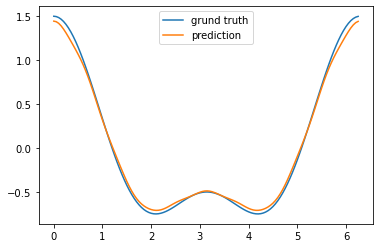

In [7]:
M=10
N=100
Lambda = np.diag([1/k for k in range(1,M+1)])
lmbda = 0.05
X = np.random.random(N)*2*np.pi
K = np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.matrix(psi_cosine(X))
R = np.linalg.inv(K+lmbda*N*np.identity(N))

def target_func(x):
    return np.cos(x)+0.5*np.cos(2*x)

alpha = target_func(X)*R


def prediction(x):
 return alpha*np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.transpose(np.matrix(psi_cosine(x)))

x_axis = np.arange(0,2*np.pi,0.05)

plt.plot(x_axis,target_func(x_axis),label="grund truth")
plt.plot(x_axis,[prediction(x)[0].item(0) for x in x_axis],label="prediction")
plt.legend()
plt.show()



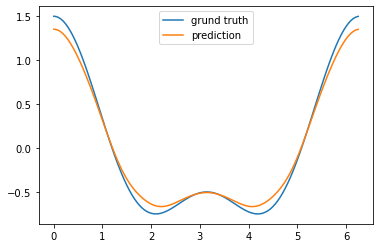

bias = 0.006910945321557273


In [8]:
def predictor(N,lmbda,eigenvalues,X,label,x):
    Lambda = np.diag(eigenvalues)
    K = np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.matrix(psi_cosine(X))
    R = np.linalg.inv(K+lmbda*N*np.identity(N))
    alpha = label*R
    a = alpha*np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.transpose(np.matrix(psi_cosine(x)))
    return a[0].item(0)

X=np.random.random(N)*2*np.pi

plt.plot(x_axis,target_func(x_axis),label="grund truth")
plt.plot(x_axis,[predictor(100,0.1,[1/k for k in range(1,M+1)],X,target_func(X),x) for x in x_axis],label="prediction")
plt.legend()
plt.show()

print("bias =", mean_squared_error([predictor(100,0.1,[1/k for k in range(1,M+1)],X,target_func(X),x) for x in x_axis],target_func(x_axis)))


In [722]:
for N in range(10,100,10):
    test_error=0
    for it in range(100):
        X=np.random.random(N)*2*np.pi
        test_error+=mean_squared_error([predictor(N,0.05,[1/k for k in range(1,M+1)],X,target_func(X),x) for x in x_axis],target_func(x_axis))/100
    print(test_error)

0.038499685826370054
0.010606707188958321
0.005607542817478305
0.004454034391061183
0.003498070776744844
0.0029789965258212882
0.003223340562160436
0.0028382084697231406
0.002799249097752613
0.002683149137462198
0.0026190176231388786
0.0025959739879081217
0.002629289669105838
0.002536204897733898
0.002529620821744258
0.0025756521177966443
0.0024572356375491228
0.002352767366394641
0.0024037275612754875
0.0024841054205423305
0.0024131435164940172
0.0023784890971967313
0.002396192693685338
0.002372615235245173
0.002454123621457954
0.002359751528270859
0.0023654363680927957
0.0023511985723979815
0.0023787492181369047
0.002330701070123466
0.0023227182119840424
0.002302936889561967
0.002312945000509805
0.002319532375138618
0.002297189949493916
0.0022641149820145363
0.00231822016005789
0.0023242934337287862
0.002310618766602713
0.002292835010743768
0.002293643299127884
0.0023137913932521543
0.0022762968409131014
0.002277359245565795
0.002290175587416192
0.0022882451169013887
0.00232540849503

From our calculation we have the bias part of the test error: 
$$B = \sum_{k=1}^M \big( \frac{\lambda \tilde{\gamma}_k - \tilde{\gamma}_{M+1} \lambda_k \eta_k}{\lambda_k+\lambda} \big)^2 + \tilde{\gamma}_{M+1}^2+ \text{res}_4(\bm{\Delta}_M)$$

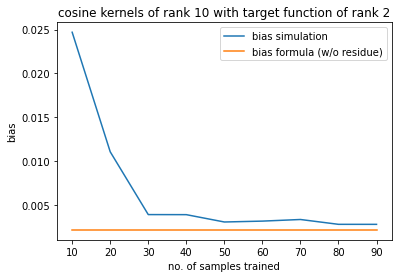

In [106]:
#Let's try an example
N=100
M=10
lmbda = 0.05
tilde_gamma = [1/np.sqrt(2),1/np.sqrt(8),0,0,0,0,0,0,0,0,0]
eigenvalues = [1/k for k in range(1,M+1)]
eta = np.zeros(M) #define eta later

def bias_formula(M,lmbda,eigenvalues,eta,tilde_gamma):
 return np.sum([(lmbda*tilde_gamma[k]-tilde_gamma[M]*eigenvalues[k]*eta[k])**2/(eigenvalues[k]+lmbda)**2 for k in range(M)])+ tilde_gamma[M]**2 


def bias_simulation(N,lmbda,eigenvalues):
    no_it=20
    bias_simulation=0
    for it in range(no_it):
        X=np.random.random(N)*2*np.pi
        bias_simulation+= mean_squared_error([predictor(N,lmbda,eigenvalues,X,target_func(X),x) for x in x_axis],target_func(x_axis))/no_it
    return bias_simulation

N_list=np.arange(10,100,10)
bias_simulation_list=[]
for N in N_list:
    bias_simulation_list.append(bias_simulation(N,lmbda,eigenvalues))
plt.plot(N_list,bias_simulation_list,label="bias simulation")
plt.plot(N_list, bias_formula(M,lmbda,eigenvalues,eta,tilde_gamma)*np.ones(len(N_list)),label="bias formula (w/o residue)")
plt.title("cosine kernels of rank {} with target function of rank 2".format(M))
plt.xlabel("no. of samples trained")
plt.ylabel("bias")
plt.legend()
plt.show()


From our calculation, we have
$$V = \frac{\sigma_\text{noise}^2}{N} \cdot \sum_{k=1}^M \frac{\lambda_k^2}{(\lambda_k + \lambda)^2} + O\Big(\frac{\delta}{\lambda}\cdot \frac{\sum_{k=1}^M \lambda_k}{N}\Big) + O\Big(\frac{\delta^2}{\lambda^2}\cdot \frac{\sum_{k=1}^M \lambda_k^2}{N}\Big) $$

In [117]:
M=10
N=100
Lambda = np.diag([1/k for k in range(1,M+1)])
lmbda = 0.05
X = np.random.random(N)*2*np.pi
K = np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.matrix(psi_cosine(X))
R = np.linalg.inv(K+lmbda*N*np.identity(N))
M_mat = np.transpose(np.matrix(psi_cosine(X)))*Lambda*Lambda*np.matrix(psi_cosine(X))
#assume sigma_noise = 1
print("vairance=",np.trace(R*M_mat*R))
print("vairance formula =",np.sum([(1+k*lmbda)**(-2) for k in range(1,M+1)])/N)

vairance= 0.06757590963382301
vairance formula = 0.06394749475429715


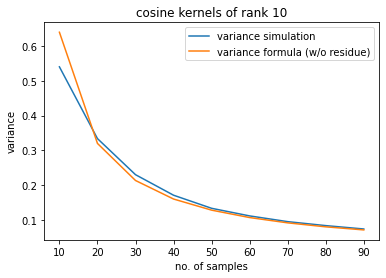

In [119]:
M=10
Lambda = np.diag([1/k for k in range(1,M+1)])
lmbda = 0.05
#assume sigma_noise = 1
N_list = np.arange(M,10*M,M)
no_it = 20
variance_simulation_list=[]
variance_formula_list=[]

for N in N_list:
    variance_simulation=0
    for it in range(no_it):
        X = np.random.random(N)*2*np.pi
        K = np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.matrix(psi_cosine(X))
        R = np.linalg.inv(K+lmbda*N*np.identity(N))
        M_mat = np.transpose(np.matrix(psi_cosine(X)))*Lambda*Lambda*np.matrix(psi_cosine(X))
        variance_simulation+=np.trace(R*M_mat*R)/no_it
    variance_simulation_list.append(variance_simulation)
    variance_formula_list.append(np.sum([(1+k*lmbda)**(-2) for k in range(1,M+1)])/N)

plt.plot(N_list,variance_simulation_list,label="variance simulation")
plt.plot(N_list,variance_formula_list,label="variance formula (w/o residue)")
plt.title("cosine kernels of rank {}".format(M))
plt.xlabel("no. of samples")
plt.ylabel("variance")
plt.legend()
plt.show()

Combining the bias and vairance to compute the test error. 

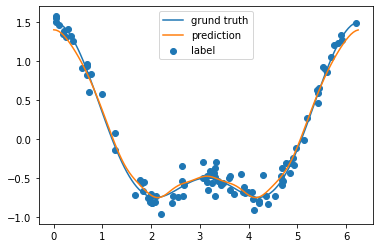

bias = 0.002383258512539683
vairance= 0.006446605460453149
bias+variance= 0.008829863972992832
test error = 0.003018896687142409


In [88]:
N=100
M=10
Lambda = np.diag([1/k for k in range(1,M+1)])
lmbda = 0.05
X=np.random.random(N)*2*np.pi
noise=np.random.normal(0,0.1,N)
label=target_func(X)+noise

K = np.transpose(np.matrix(psi_cosine(X)))*Lambda*np.matrix(psi_cosine(X))
R = np.linalg.inv(K+lmbda*N*np.identity(N))
M_mat = np.transpose(np.matrix(psi_cosine(X)))*Lambda*Lambda*np.matrix(psi_cosine(X))
sigma_noise = 0.1


plt.plot(x_axis,target_func(x_axis),label="grund truth")
plt.scatter(X,label,label="label")
plt.plot(x_axis,[predictor(100,lmbda,[1/k for k in range(1,M+1)],X,label,x) for x in x_axis],label="prediction")
plt.legend()
plt.show()

print("bias =", mean_squared_error([predictor(100,lmbda,[1/k for k in range(1,M+1)],X,target_func(X),x) for x in x_axis],target_func(x_axis)))
print("vairance=",sigma_noise*np.trace(R*M_mat*R))
print("bias+variance=",mean_squared_error([predictor(100,lmbda,[1/k for k in range(1,M+1)],X,target_func(X),x) for x in x_axis],target_func(x_axis))+sigma_noise*np.trace(R*M_mat*R))
print("test error =", mean_squared_error([predictor(100,lmbda,[1/k for k in range(1,M+1)],X,label,x) for x in x_axis],target_func(x_axis)))